In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Mostramos cómo quedo el dataset con el análisis exploratorio previamente realizado en la notebook 1.

In [14]:
ds_hotel=pd.read_csv('./hotels_train_filtrado.csv')
ds_trabajo = ds_hotel.copy()
ds_trabajo.head(20)

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,...,adr,total_of_special_requests,reservation_status_date,id,is_canceled,arrival_date,region,agent_specified,total_guests,more_than_zero_days_in_waiting_list
0,City Hotel,1.633333,1,2,Online TA,TA/TO,0,0,0,D,...,115.50,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,2016-09-05,Americas,1,1,0
1,Resort Hotel,0.133333,0,1,Groups,Direct,0,0,0,A,...,42.00,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,2015-10-31,Europe,0,2,0
2,City Hotel,0.833333,0,1,Online TA,TA/TO,0,0,0,F,...,229.00,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,2016-10-13,Europe,1,4,0
3,City Hotel,0.866667,2,5,Groups,TA/TO,0,0,0,A,...,75.00,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,2016-12-12,Europe,1,2,0
4,City Hotel,3.466667,2,5,Offline TA/TO,TA/TO,0,0,0,A,...,75.00,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0,2017-03-19,Europe,1,2,0
5,City Hotel,0.033333,3,5,Direct,Direct,0,0,0,A,...,133.00,0,2015-09-22,8f62c6f7-60a5-4b54-8ced-faaf9213a7a7,0,2015-09-14,Africa,0,1,0
6,Resort Hotel,3.733333,4,9,Offline TA/TO,TA/TO,0,0,0,D,...,66.42,1,2015-11-25,c7e59753-c8a7-42eb-977b-f0ffaf1716eb,0,2015-11-12,Europe,1,2,0
7,City Hotel,6.400000,2,1,Online TA,TA/TO,0,1,0,A,...,76.50,0,2015-07-03,b36e1623-aa3b-468d-bc5c-2443cfbf0fe6,1,2015-07-12,Europe,1,2,0
8,City Hotel,8.566667,2,2,Online TA,TA/TO,0,0,0,A,...,107.10,2,2017-06-08,4ad12f6e-0cda-478f-bd4a-7a890f08a951,0,2017-06-04,Europe,1,2,0
9,Resort Hotel,0.133333,0,1,Online TA,TA/TO,0,0,0,A,...,65.00,2,2016-12-11,491511e8-e916-433c-833d-c6e03f47bbdf,0,2016-12-10,Europe,1,2,0


Como estamos hablando de reservaciones en hoteles, es válido tomar en cuenta las reservaciones por temporadas. De tal forma se genera una nueva variable que se le asignará una temporada correspondiente a cada dato según su fecha de llegada (LAS TEMPORADAS SON REPRESENTATIVAS)

In [15]:
ds_trabajo['arrival_date'] = pd.to_datetime(ds_trabajo['arrival_date'])

# Crear una nueva columna 'season' basada en los valores de la columna 'arrival_date'
ds_trabajo['season'] = pd.cut(ds_trabajo['arrival_date'].dt.month,
                              bins=[0,3,6,9,12],
                              labels=['Winter', 'Spring', 'Summer', 'Autumn'])
ds_trabajo.head()

,hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,...,total_of_special_requests,reservation_status_date,id,is_canceled,arrival_date,region,agent_specified,total_guests,more_than_zero_days_in_waiting_list,season
0,City Hotel,1.633333,1,2,Online TA,TA/TO,0,0,0,D,...,1,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,2016-09-05,Americas,1,1,0,Summer
1,Resort Hotel,0.133333,0,1,Groups,Direct,0,0,0,A,...,0,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,2015-10-31,Europe,0,2,0,Autumn
2,City Hotel,0.833333,0,1,Online TA,TA/TO,0,0,0,F,...,2,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,2016-10-13,Europe,1,4,0,Autumn
3,City Hotel,0.866667,2,5,Groups,TA/TO,0,0,0,A,...,0,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,2016-12-12,Europe,1,2,0,Autumn
4,City Hotel,3.466667,2,5,Offline TA/TO,TA/TO,0,0,0,A,...,1,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0,2017-03-19,Europe,1,2,0,Winter


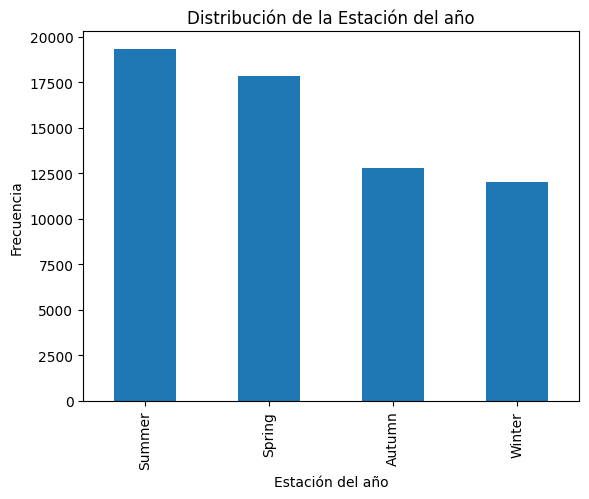

In [16]:
frecuencia = ds_trabajo['season'].value_counts()

plt.xlabel('Estación del año')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Estación del año')
frecuencia.plot(kind='bar')
plt.show()

Al agregar la variable `season` logramos ver que durante el verano es donde más reservas hay pero a su vez mas cancelaciones, mientras que en invierno y otoño disminuyen,
pero son menos las cancelaciones

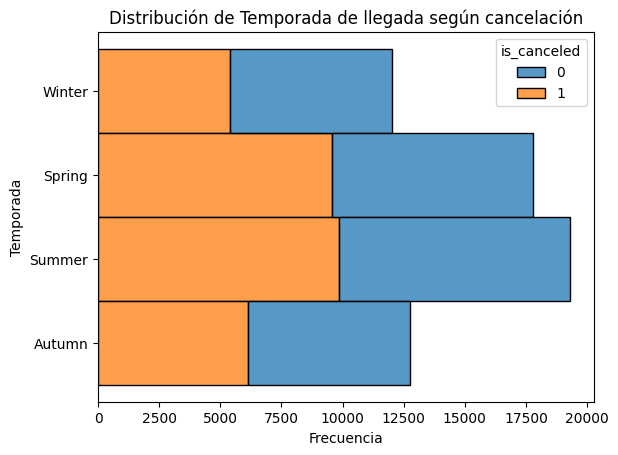

In [17]:
arrival_canceled = ds_trabajo[['season', 'is_canceled']]

arrival_canceled = arrival_canceled.groupby(['season', 'is_canceled']).size().reset_index(name='counts')
plt.xlabel('Frecuencia')
plt.ylabel('Temporada')
plt.title('Distribución de Temporada de llegada según cancelación')
sns.histplot(y='season', weights='counts', hue='is_canceled', multiple='stack', data=arrival_canceled, bins=35)
plt.show()

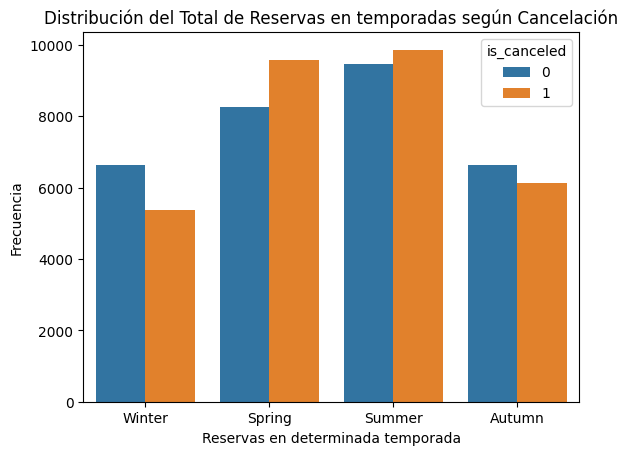

In [18]:
sns.countplot(x="season", hue="is_canceled", data=ds_trabajo)

plt.xlabel('Reservas en determinada temporada')
plt.ylabel('Frecuencia')
plt.title('Distribución del Total de Reservas en temporadas según Cancelación')

plt.show()

In [19]:
table = pd.pivot_table(ds_trabajo, values='is_canceled', index=['hotel', 'season'], columns=[], aggfunc=lambda x: x.sum()/len(x))
table

is_canceled
hotel        season             
City Hotel   Winter     0.511607
             Spring     0.583452
             Summer     0.540011
             Autumn     0.544220
Resort Hotel Winter     0.323737
             Spring     0.421555
             Summer     0.450702
             Autumn     0.349903

Vimos previamente que las variables `assigned_room_type` y `reserver_room_type` no tiene relacion directa con `is_canceled`, las reinterpretamos a ambas como "¿se le asignó el cuarto deseado?" y lo transformamos en una columna que puede darnos información

In [20]:
ds_trabajo['room_type_match'] = ds_trabajo['reserved_room_type'] == ds_trabajo['assigned_room_type']

De esta forma tengo una variable booleana que me indicará si se le asignó el cuarto deseado y qué relación tiene con is_canceled

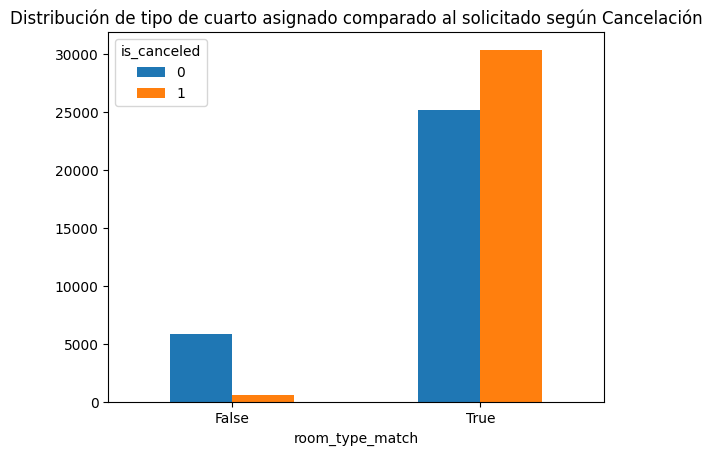

In [21]:
tabla_frecuencia = pd.crosstab(ds_trabajo['room_type_match'], ds_trabajo['is_canceled'])
tabla_frecuencia.plot.bar(rot=0)

plt.title("Distribución de tipo de cuarto asignado comparado al solicitado según Cancelación")
plt.show()

Podemos ver que aunque no se le asignó el cuarto deseado, el porcentaje de cancelación es mucho más bajo. Tal vez se deba a una mejoría en la asignación por el mismo costo, por ejemplo

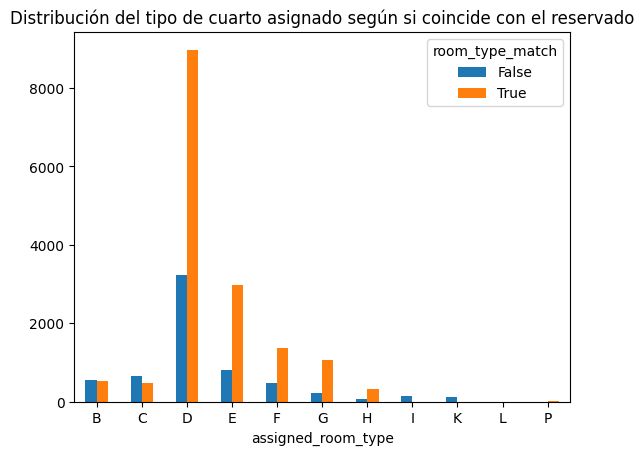

In [22]:
df = ds_trabajo.drop(ds_trabajo[ds_trabajo['assigned_room_type'] == 'A'].index) #SACO EL VALOR DE "A" PORQUE MOLESTA EN LA VISUALIZACION DEL GRAFICO
tabla_frecuencia = pd.crosstab(df['assigned_room_type'], df['room_type_match'])
tabla_frecuencia.plot.bar(rot=0)
plt.title("Distribución del tipo de cuarto asignado según si coincide con el reservado")
plt.show()

Pensamos que podemos eliminar las columnas `assigned_room_type` y `reserved_room_type` ya que podemos sacar información más interesante de la variable `room_type_match`, sumado a que facilitará el análisis dadas las numerosas categorías de ambas columnas.

In [23]:
ds_trabajo = ds_trabajo.drop('assigned_room_type', axis=1)
ds_trabajo = ds_trabajo.drop('reserved_room_type', axis=1)

Guardamos el progreso sobre el dataset en uno nuevo para trabajarlo en el siguiente notebook correspondiente al checkpoint 2.

In [24]:
ds_trabajo.to_csv('hotels_train_filtrado2.csv', index=False)